https://www.matthewproctor.com/australian_postcodes#downloadlinks

In [15]:
import geopandas as gpd

In [16]:
df = gpd.pd.read_csv('../data/australian_postcodes.csv')

In [17]:
df.head()

,id,postcode,locality,state,long,lat,dc,type,status,sa3,...,MMM_2019,ced,altitude,chargezone,phn_code,phn_name,lgaregion,lgacode,electorate,electoraterating
0,230,200,ANU,ACT,149.11900,-35.277700,NaN,NaN,Updated 3-Dec-2022,NaN,...,1.0,NaN,NaN,N2,NaN,NaN,Unincorporated ACT,89399.0,Durack,NaN
1,21820,200,Australian National University,ACT,149.11890,-35.277700,NaN,NaN,Updated 3-Dec-2022,NaN,...,1.0,NaN,NaN,N2,NaN,NaN,Unincorporated ACT,89399.0,Durack,NaN
2,232,800,DARWIN,NT,130.83668,-12.458684,NaN,NaN,Updated 3-Dec-2022,70101.0,...,2.0,NaN,NaN,NT1,PHN701,Northern Territory,Darwin Waterfront Precinct,71150.0,Solomon,Inner Metropolitan
3,24049,800,DARWIN CITY,NT,130.83668,-12.458684,NaN,NaN,Updated 3-Dec-2022,70101.0,...,2.0,NaN,NaN,NT1,PHN701,Northern Territory,Darwin Waterfront Precinct,71150.0,Solomon,Inner Metropolitan
4,233,801,DARWIN,NT,130.83668,-12.458684,NaN,NaN,Updated 3-Dec-2022,70101.0,...,2.0,NaN,NaN,NT1,PHN701,NaN,Darwin Waterfront Precinct,71150.0,Lingiari,Rural


In [18]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.long, df.lat), crs="EPSG:4326"
)
gdf.head()

,id,postcode,locality,state,long,lat,dc,type,status,sa3,...,ced,altitude,chargezone,phn_code,phn_name,lgaregion,lgacode,electorate,electoraterating,geometry
0,230,200,ANU,ACT,149.11900,-35.277700,NaN,NaN,Updated 3-Dec-2022,NaN,...,NaN,NaN,N2,NaN,NaN,Unincorporated ACT,89399.0,Durack,NaN,POINT (149.11900 -35.27770)
1,21820,200,Australian National University,ACT,149.11890,-35.277700,NaN,NaN,Updated 3-Dec-2022,NaN,...,NaN,NaN,N2,NaN,NaN,Unincorporated ACT,89399.0,Durack,NaN,POINT (149.11890 -35.27770)
2,232,800,DARWIN,NT,130.83668,-12.458684,NaN,NaN,Updated 3-Dec-2022,70101.0,...,NaN,NaN,NT1,PHN701,Northern Territory,Darwin Waterfront Precinct,71150.0,Solomon,Inner Metropolitan,POINT (130.83668 -12.45868)
3,24049,800,DARWIN CITY,NT,130.83668,-12.458684,NaN,NaN,Updated 3-Dec-2022,70101.0,...,NaN,NaN,NT1,PHN701,Northern Territory,Darwin Waterfront Precinct,71150.0,Solomon,Inner Metropolitan,POINT (130.83668 -12.45868)
4,233,801,DARWIN,NT,130.83668,-12.458684,NaN,NaN,Updated 3-Dec-2022,70101.0,...,NaN,NaN,NT1,PHN701,NaN,Darwin Waterfront Precinct,71150.0,Lingiari,Rural,POINT (130.83668 -12.45868)


<Axes: >

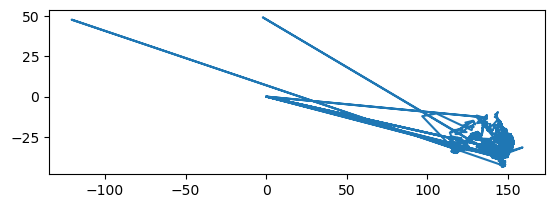

In [19]:
from shapely.geometry import LineString

def convert_gdf_to_linestring(gdf):
    # Create a LineString from the points
    line = LineString(gdf.geometry.tolist())

    # Create a GeoDataFrame with the LineString
    return gpd.GeoDataFrame(geometry=[line])


convert_gdf_to_linestring(gdf).plot()

<Axes: >

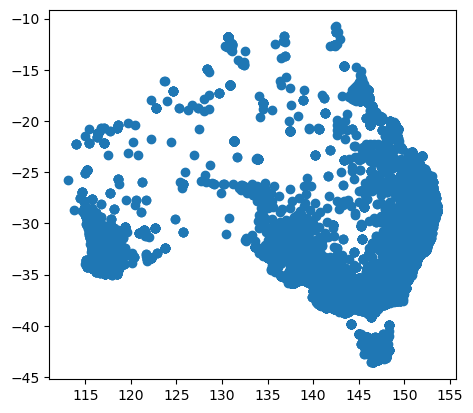

In [20]:
# http://bboxfinder.com/#-45.559737,109.346924,-10.454727,157.862549

def filter_gdf_by_bounding_box(gdf,minimum_longitude,minimum_latitude,maximum_longitude,maximum_latitude):
    return gdf.cx[minimum_longitude:maximum_longitude, minimum_latitude:maximum_latitude]

filtered_gdf = filter_gdf_by_bounding_box(gdf,109.346924,-45.559737,157.862549,-10.454727)

filtered_gdf.plot()

<Axes: >

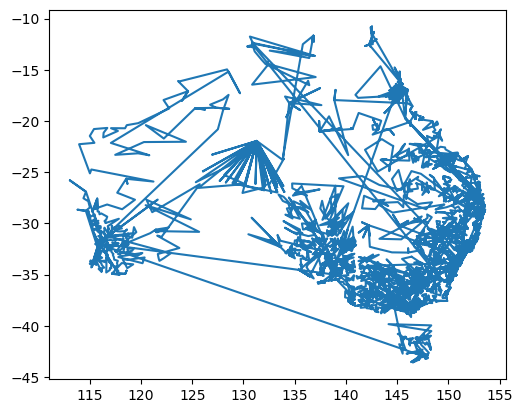

In [21]:
convert_gdf_to_linestring(filtered_gdf).plot()

In [22]:
import folium
# Create an interactive Map instance
m = folium.Map(location=[-27, 135], zoom_start=4, control_scale=True)

# Convert the LineString to GeoJSON
line_json = convert_gdf_to_linestring(filtered_gdf).to_json()


# Add the LineString to the map as a GeoJSON layer
folium.GeoJson(line_json, name='LineString').add_to(m)

# Add a layer control to toggle the visibility of the LineString layer
folium.LayerControl().add_to(m)

# Display the map
m

In [23]:

file_path = './australia-post-codes-connected.html'
html = m.save(file_path)
with open(file_path, 'r') as file:
    html_content = file.read()

from IPython.core.display import HTML
HTML(html_content)